# Tim
- 2602099812 - Stephen Wijaya Utama
- 2602078146 - Daniel Ebenezer Budiharto

# Dataset
Dataset diambil dari rekap penjualan PT Tanjung Mulya bulan Juni, Juli, Agustus, dan Oktober. Dalam satu kertas rekap penjualan, terdapat tanggal penjualan dan kolom khusus yang berisi berapa saos lombok dan saos tomat yang terjual pada tanggal itu. 
Terdapat tanggal-tanggal di mana tidak terjadi transaksi karena hari libur dan alasan lainnya.

![image1](https://i.ibb.co.com/0KFZj0q/Whats-App-Image-2024-12-09-at-20-53-29-44f71e18.jpg)

Rekap diolah menjadi format digital dengan kolom tanggal, banyaknya saos lombok yang terjual, dan banyaknya saos tomat yang terjual.

![image2](https://i.ibb.co.com/x6XM18Z/Screenshot-2024-12-09-210005.png)

Pada akhirnya, terdapat 4 file berformat .csv yang akan diolah pada notebook ini.

![image3](https://i.ibb.co.com/T4Nq6t0/Screenshot-2024-12-09-210553.png)

# Preprocessing

## Verifikasi dan Penggabungan
Pada bab ini dilakukan verifikasi apakah dataset sudah lengkap, menggabungkan dataset training menjadi 1 dataframe, dan mengubah format tanggal yang sebelumnya string menjadi datetime

In [1]:
# Sel ini akan membuat seluruh output sel mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sel ini memunculkan semua file yang ada direktori untuk mengecek apakah dataset yang dibutuhkan sudah lengkap
import os 

for filename in os.listdir('.'):
    print(filename)

.git
august.csv
bda_final_notebook.ipynb
july.csv
june.csv
october.csv
README.md


In [3]:
# Sel ini membaca dataset untuk training, menggabungkannya menjadi 1 dataframe, dan memunculkannya
import pandas as pd

df1 = pd.read_csv('./june.csv')
df2 = pd.read_csv('./july.csv')
df3 = pd.read_csv('./august.csv')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

print(combined_df.head())

      tanggal  lombok_terjual  tomat_terjual
0  03-06-2024             288             80
1  04-06-2024             186             62
2  05-06-2024             224             38
3  06-06-2024             280            100
4  08-06-2024             362            146


In [4]:
# Sel ini membaca dataset untuk testing dan memunculkannya ke layar
df4 = pd.read_csv('./october.csv')

print(df4.head())

      tanggal  lombok_terjual  tomat_terjual
0  31-10-2024             357             87
1  30-10-2024              72             16
2  29-10-2024             137             50
3  26-10-2024             220             71
4  25-10-2024              72             17


In [5]:
# Pada dataframe training, kolom 'tanggal' masih berupa string, oleh karena itu sel ini mengubahnya menjadi datetime
# untuk mempermudah pemrosesan
combined_df['tanggal'] = pd.to_datetime(combined_df['tanggal'], format="%d-%m-%Y")
print(combined_df.head())

     tanggal  lombok_terjual  tomat_terjual
0 2024-06-03             288             80
1 2024-06-04             186             62
2 2024-06-05             224             38
3 2024-06-06             280            100
4 2024-06-08             362            146


In [6]:
# Pada dataframe testing, kolom 'tanggal' masih berupa string, oleh karena itu sel ini mengubahnya menjadi datetime
# untuk mempermudah pemrosesan
df4['tanggal'] = pd.to_datetime(df4['tanggal'], format="%d-%m-%Y")
print(df4.head())

     tanggal  lombok_terjual  tomat_terjual
0 2024-10-31             357             87
1 2024-10-30              72             16
2 2024-10-29             137             50
3 2024-10-26             220             71
4 2024-10-25              72             17


## Visualisasi 
Pada bab ini, dilakukan visualisasi data untuk mengetahui berapa jumlah saos lombok dan tomat yang terjual di setiap bulannya dengan grafik batang dan bagaimana perkembangan penjualan setiap harinya dengan grafik timeseries

### Tabel
Sebelum menambahkan grafik, dimunculkan nilai-nilai dalam bentuk tabel

In [7]:
# Sel ini memunculkan jumlah saos lombok dan tomat yang terjual pada bulan Juni, Juli, dan Agustus dan membuat kolom
# baru bernama 'bulan' pada dataframe
combined_df['bulan'] = combined_df['tanggal'].dt.to_period('M')
sales_per_month1 = combined_df.groupby('bulan')[['lombok_terjual', 'tomat_terjual']].sum()
print(sales_per_month1)

         lombok_terjual  tomat_terjual
bulan                                 
2024-06            3409           1013
2024-07            5502           1565
2024-08            2549            734


In [8]:
# Sel ini memunculkan jumlah saos lombok dan tomat yang terjual pada bulan Oktober dan membuat kolom baru bernama
# 'bulan' pada dataframe
df4['bulan'] = df4['tanggal'].dt.to_period('M')
sales_per_month2 = df4.groupby('bulan')[['lombok_terjual', 'tomat_terjual']].sum()
print(sales_per_month2)

         lombok_terjual  tomat_terjual
bulan                                 
2024-10            2198            593


In [9]:
# Sel ini memunculkan dataframe dengan kolom yang baru
print(combined_df.head())

     tanggal  lombok_terjual  tomat_terjual    bulan
0 2024-06-03             288             80  2024-06
1 2024-06-04             186             62  2024-06
2 2024-06-05             224             38  2024-06
3 2024-06-06             280            100  2024-06
4 2024-06-08             362            146  2024-06


In [10]:
# Sel ini membuat dataframe dengan kolom yang baru
print(df4.head())

     tanggal  lombok_terjual  tomat_terjual    bulan
0 2024-10-31             357             87  2024-10
1 2024-10-30              72             16  2024-10
2 2024-10-29             137             50  2024-10
3 2024-10-26             220             71  2024-10
4 2024-10-25              72             17  2024-10


### Grafik Batang
Grafik batang untuk penjualan di Bulan Juni, Juli, Agustus, dan Oktober

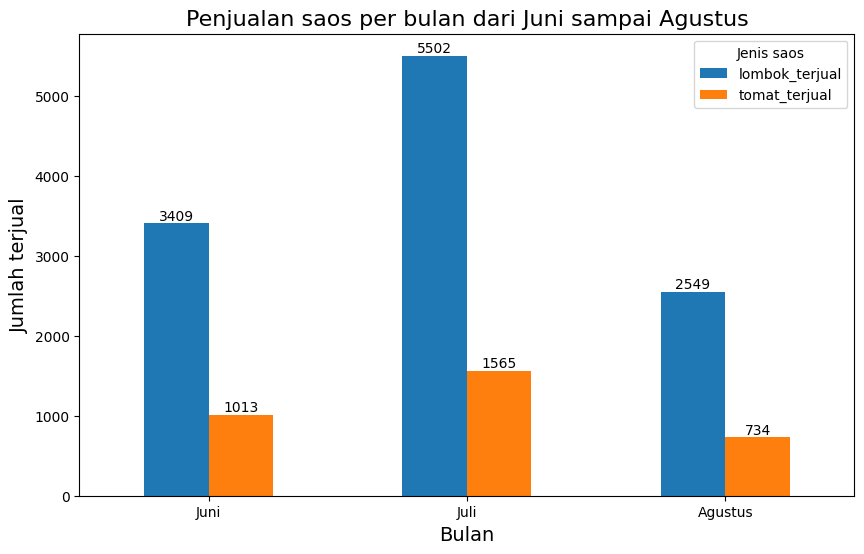

In [11]:
# Sel ini mengimpor library matplotlib dan memvisualisasikan jumlah 
# penjualan saos lombok dan tomat pada bulan Juni, Juli, dan
# Agustus dalam bentuk grafik batang
import matplotlib.pyplot as plt

ax = sales_per_month1.plot(kind='bar', figsize=(10, 6), legend=True)

plt.title('Penjualan saos per bulan dari Juni sampai Agustus', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah terjual', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(ticks=range(len(sales_per_month1)), labels=['Juni', 'Juli', 'Agustus'], rotation=0)


plt.legend(title='Jenis saos')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()

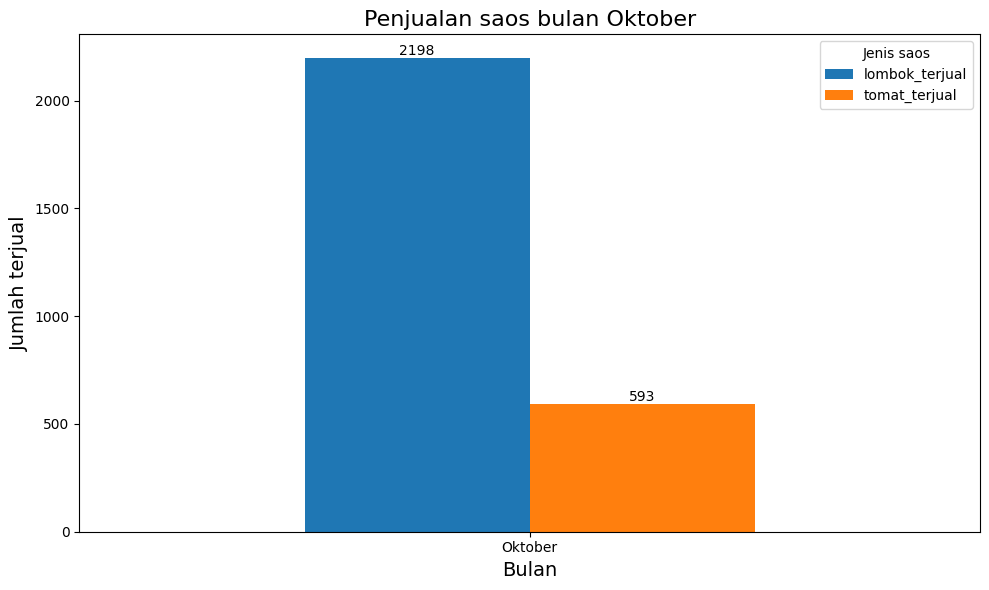

In [12]:
# Sel ini memvisualisasikan jumlah penjualan saos lombok dan tomat pada bulan Oktober dalam bentuk grafik batang
ax2 = sales_per_month2.plot(kind='bar', figsize=(10, 6), legend=True)

plt.title('Penjualan saos bulan Oktober', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah terjual', fontsize=14)

for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(ticks=range(len(sales_per_month2)), labels=['Oktober'], rotation=0)


plt.legend(title='Jenis saos')
plt.tight_layout()
plt.show()

### Grafik Timeseries
Grafik timeseries yang menunjukkan naik turunnya penjualan saos lombok dan tomat di setiap bulan

In [13]:
# Sel ini membuat dataframe yang terindeks berdasarkan dataframe yang sudah ada

combined_indexed_df = combined_df.set_index('tanggal')
df4_indexed = df4.set_index('tanggal')

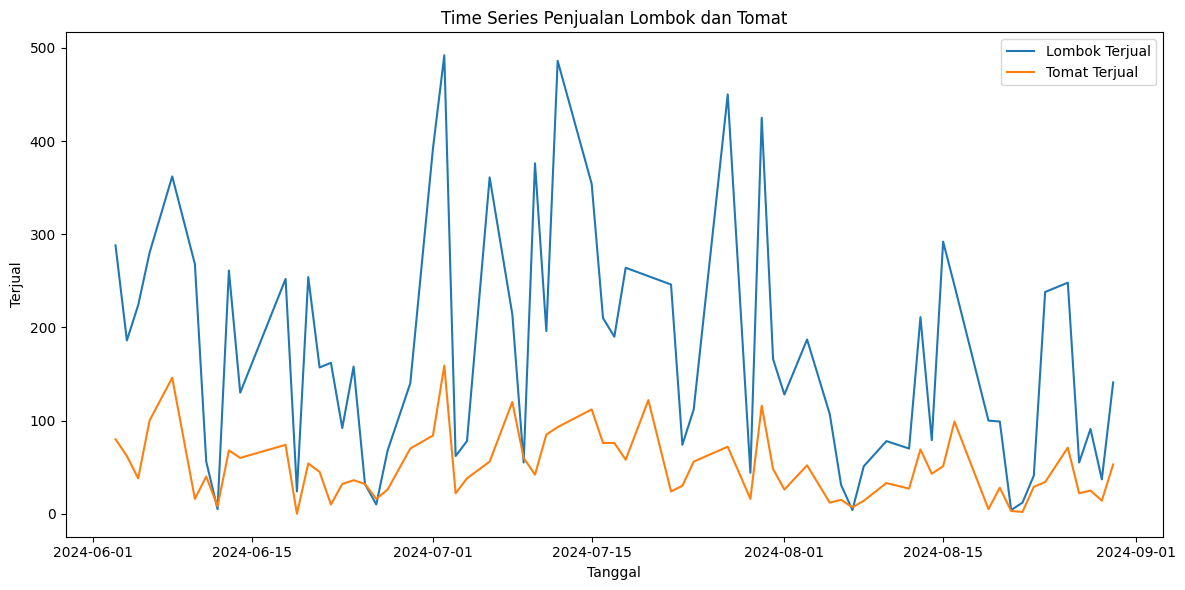

In [14]:
# Sel ini menunjukkan naik turunnya penjualan saos tomat dan lombok setiap harinya pada bulan Juni, Juli, dan Agustus
# dalam grafik timeseries
plt.figure(figsize=(12, 6))
plt.plot(combined_indexed_df.index, combined_indexed_df['lombok_terjual'], label='Lombok Terjual')
plt.plot(combined_indexed_df.index, combined_indexed_df['tomat_terjual'], label='Tomat Terjual')

plt.xlabel('Tanggal')
plt.ylabel('Terjual')
plt.title('Time Series Penjualan Lombok dan Tomat')
plt.legend()

plt.tight_layout()


plt.show()

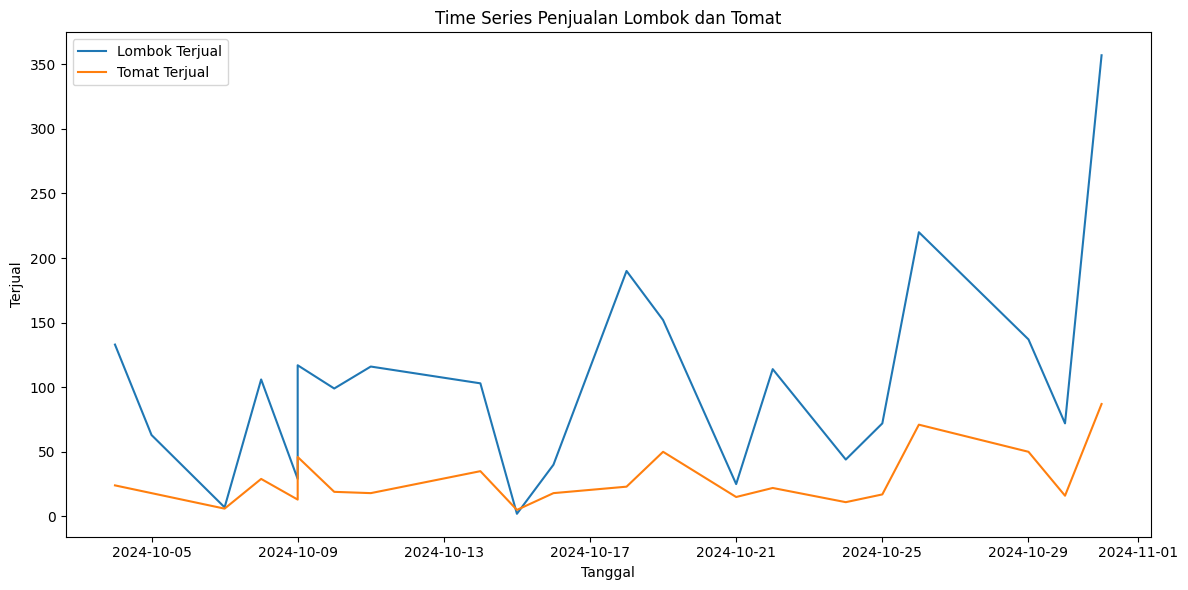

In [15]:
# Sel ini menunjukkan naik turunnya penjualan saos tomat dan lombok setiap harinya pada bulan Oktober
# dalam grafik timeseries
plt.figure(figsize=(12, 6))
plt.plot(df4_indexed.index, df4_indexed['lombok_terjual'], label='Lombok Terjual')
plt.plot(df4_indexed.index, df4_indexed['tomat_terjual'], label='Tomat Terjual')

plt.xlabel('Tanggal')
plt.ylabel('Terjual')
plt.title('Time Series Penjualan Lombok dan Tomat')
plt.legend()

plt.tight_layout()
plt.show()

## Splitting
Splitting dilakukan untuk mengatur variabel yang menyimpan data training dan yang menyimpan data testing

In [16]:
# Sel ini membuat kolom baru yaitu representasi numerik dari tanggal pada setiap dataframe
combined_df['tanggal_num'] = combined_df['tanggal'].map(pd.Timestamp.timestamp)
df4['tanggal_num'] = df4['tanggal'].map(pd.Timestamp.timestamp)

In [17]:
# Sel ini membuat variabel untuk testing dan training
X_train = combined_df[['tanggal_num']]
y_train = combined_df[['lombok_terjual', 'tomat_terjual']]

X_test = df4[['tanggal_num']]
y_test = df4[['lombok_terjual', 'tomat_terjual']]

# Model Algoritma
Algoritma yang digunakan untuk melakukan forecasting adalah Regresi Linier, Regresi Polinomial, dan ARIMA. Akurasi algoritma ditentukan oleh seberapa rendahnya mean squared error.

## Regresi Linier
Regresi linier adalah cara untuk merumuskan pola pada data secara linier. Pada kasus ini, regresi linier memiliki MSE bernilai 4389,067.

In [18]:
# Sel ini mengimpor library untuk regresi linier, melakukan regresi linier, dan menunjukkan mean squared error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lingres = LinearRegression()
lingres.fit(X_train, y_train)

pred = lingres.predict(X_test)

mse = mean_squared_error(y_test, pred)

print(mse)

4389.067265224718


In [19]:
# Sel ini menunjukkan hasil prediksi dan juga hasil seharusnya dari regresi linier
results_df = df4[['tanggal']].copy()
results_df['lombok_terjual_actual'] = y_test['lombok_terjual'].values
results_df['tomat_terjual_actual'] = y_test['tomat_terjual'].values
results_df['lombok_terjual_pred'] = pred[:, 0]
results_df['tomat_terjual_pred'] = pred[:, 1]

# Display the results
print(results_df)

      tanggal  lombok_terjual_actual  tomat_terjual_actual  \
0  2024-10-31                    357                    87   
1  2024-10-30                     72                    16   
2  2024-10-29                    137                    50   
3  2024-10-26                    220                    71   
4  2024-10-25                     72                    17   
5  2024-10-24                     44                    11   
6  2024-10-22                    114                    22   
7  2024-10-21                     25                    15   
8  2024-10-19                    152                    50   
9  2024-10-18                    190                    23   
10 2024-10-16                     40                    18   
11 2024-10-15                      2                     5   
12 2024-10-14                    103                    35   
13 2024-10-11                    116                    18   
14 2024-10-10                     99                    19   
15 2024-

## Regresi Polinomial
Regresi polinomial cocok digunakan untuk mencari pola yang tidak linier. Pada kasus ini, regresi polinomial dengan derajat 2 menghasilkan MSE senilai 57868,28 lebih tinggi daripada regresi linier. Hal ini dikarenakan risiko overfitting regresi polinomial lebih tinggi daripada regresi linier. Hasil prediksi juga menunjukkan hasil negatif yang tidak mungkin.

In [27]:
# Sel ini mengimpor library untuk regresi polinomial, melakukan regresi, dan menunjukkan mean squared error
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

pred = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 57868.28069038776


In [28]:
# Sel ini menunjukkan hasil prediksi dari regresi polinomial
results_df = df4[['tanggal']].copy()
results_df['lombok_terjual_actual'] = y_test['lombok_terjual'].values
results_df['tomat_terjual_actual'] = y_test['tomat_terjual'].values
results_df['lombok_terjual_pred'] = pred[:, 0]
results_df['tomat_terjual_pred'] = pred[:, 1]

print(results_df)

      tanggal  lombok_terjual_actual  tomat_terjual_actual  \
0  2024-10-31                    357                    87   
1  2024-10-30                     72                    16   
2  2024-10-29                    137                    50   
3  2024-10-26                    220                    71   
4  2024-10-25                     72                    17   
5  2024-10-24                     44                    11   
6  2024-10-22                    114                    22   
7  2024-10-21                     25                    15   
8  2024-10-19                    152                    50   
9  2024-10-18                    190                    23   
10 2024-10-16                     40                    18   
11 2024-10-15                      2                     5   
12 2024-10-14                    103                    35   
13 2024-10-11                    116                    18   
14 2024-10-10                     99                    19   
15 2024-

## ARIMA
ARIMA adalah sebuah algoritma untuk membuat prediksi pada data timeseries. Algoritma ini cocok untuk non-seasonal data di mana pola tidak berulang secara periodik. Model ini memerlukan parameter p, d, dan q. Model ini menghasilkan MSE sebesar 11113.98 untuk lombok dan 914.90 untuk tomat.

### p, d, dan q untuk lombok yang terjual
Dengan melihat output dan membaca grafik, didapatkan nilai d yaitu 0, p yaitu 1, dan q yaitu 1.

ADF Statistic: -6.634431639228221
p-value: 5.608894862598579e-09
Critical Values:
   1%, -3.5352168748293127
Critical Values:
   5%, -2.9071540828402367
Critical Values:
   10%, -2.5911025443786984
The value of d is: 0


<Figure size 1000x600 with 0 Axes>

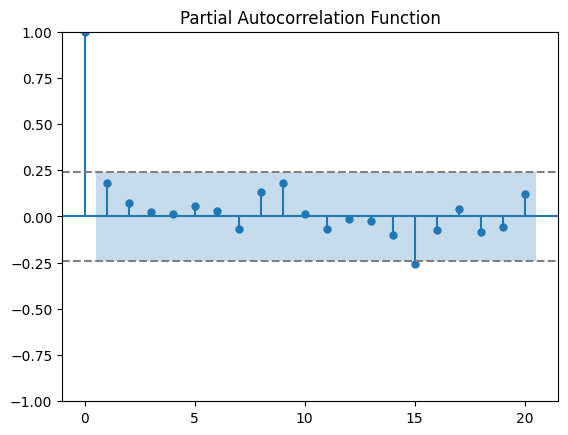

<Figure size 1000x600 with 0 Axes>

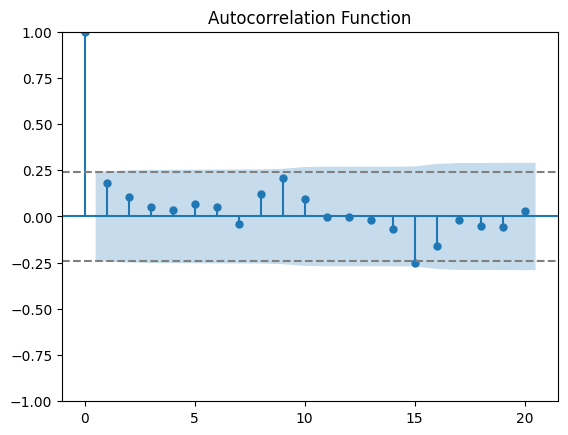

In [24]:
# Sel ini mengimpor library untuk melakukan test ADF, plot ACF, dan plot PACF untuk menemukan
# parameter p, d, dan q untuk saos lombok
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts1 = combined_indexed_df['lombok_terjual']

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    return result[1]

p_value = adf_test(ts1)

d = 0
while p_value > 0.05:
    d += 1
    ts1 = ts1.diff().dropna()
    p_value = adf_test(ts1)

print(f'The value of d is: {d}')

plt.figure(figsize=(10, 6))
plot_pacf(ts1, lags=20)
plt.axhline(y=1.96/np.sqrt(len(ts1)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(ts1, lags=20)
plt.axhline(y=1.96/np.sqrt(len(ts1)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

### p, d, dan q untuk tomat yang terjual
Dengan melihat output dan membaca grafik, didapatkan nilai d yaitu 0, p yaitu 1, dan q yaitu 0.

ADF Statistic: -6.55587804290966
p-value: 8.619444638661436e-09
Critical Values:
   1%, -3.5352168748293127
Critical Values:
   5%, -2.9071540828402367
Critical Values:
   10%, -2.5911025443786984
The value of d is: 0


<Figure size 1000x600 with 0 Axes>

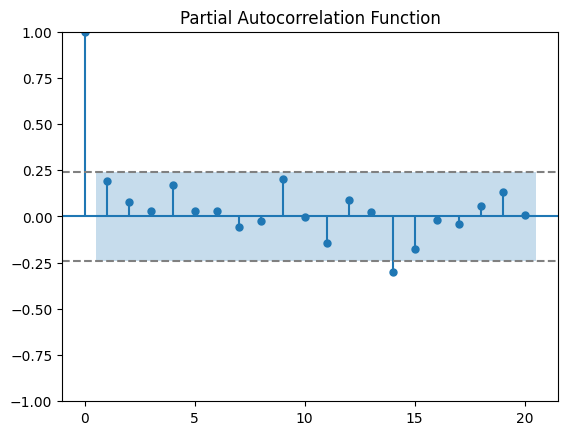

<Figure size 1000x600 with 0 Axes>

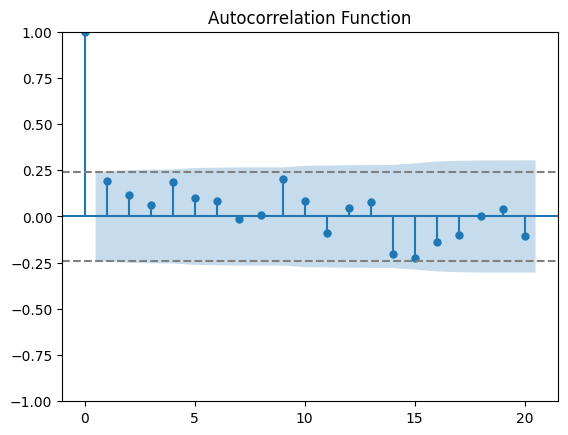

In [23]:
ts2 = combined_indexed_df['tomat_terjual']

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    return result[1]

p_value = adf_test(ts2)

d = 0
while p_value > 0.05:
    d += 1
    ts2 = ts2.diff().dropna()
    p_value = adf_test(ts2)

print(f'The value of d is: {d}')

plt.figure(figsize=(10, 6))
plot_pacf(ts2, lags=20)
plt.axhline(y=1.96/np.sqrt(len(ts2)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(ts2, lags=20)
plt.axhline(y=1.96/np.sqrt(len(ts2)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

### Forecasting
Forecasting dilakukan dengan model ARIMA berbeda untuk lombok dan tomat. Lombok diberikan parameter p = 1, d = 0, dan q = 1. Tomat diberikan parameter p = 1, d = 0, q = 0.

In [ ]:
# Sel ini mengimpor library untuk melakukan forecasting ARIMA, melakukan forecasting, 
# dan menunjukkan mean squared error
from statsmodels.tsa.arima.model import ARIMA

model_lombok = ARIMA(combined_indexed_df['lombok_terjual'], order=(1, 0, 1))
model_lombok_fit = model_lombok.fit()

forecast_lombok = model_lombok_fit.forecast(steps=len(df4))

model_tomat = ARIMA(combined_indexed_df['tomat_terjual'], order=(1, 0, 0))
model_tomat_fit = model_tomat.fit()

forecast_tomat = model_tomat_fit.forecast(steps=len(df4))

mse_lombok = mean_squared_error(df4_indexed['lombok_terjual'], forecast_lombok)
mse_tomat = mean_squared_error(df4_indexed['tomat_terjual'], forecast_tomat)

print(f'Mean Squared Error for Lombok Terjual: {mse_lombok}')
print(f'Mean Squared Error for Tomat Terjual: {mse_tomat}')

Mean Squared Error for Lombok Terjual: 11113.984187175109
Mean Squared Error for Tomat Terjual: 914.9002784535277


c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

In [26]:
# Sel ini menunjukkan hasil dari prediksi forecasting ARIMA
results_df = df4_indexed.copy()
results_df['lombok_terjual_pred'] = forecast_lombok.values
results_df['tomat_terjual_pred'] = forecast_tomat.values

print(results_df)

            lombok_terjual  tomat_terjual    bulan  lombok_terjual_pred  \
tanggal                                                                   
2024-10-31             357             87  2024-10           149.476412   
2024-10-30              72             16  2024-10           155.545869   
2024-10-29             137             50  2024-10           160.092283   
2024-10-26             220             71  2024-10           163.497840   
2024-10-25              72             17  2024-10           166.048821   
2024-10-24              44             11  2024-10           167.959669   
2024-10-22             114             22  2024-10           169.391018   
2024-10-21              25             15  2024-10           170.463190   
2024-10-19             152             50  2024-10           171.266315   
2024-10-18             190             23  2024-10           171.867908   
2024-10-16              40             18  2024-10           172.318540   
2024-10-15               

# Result and Discussion

Dalam usaha mencari algoritma yang pas untuk melakukan forecasting penjualan saos lombok dan tomat, diuji 3 model yaitu
1. Regresi Linier menghasilkan MSE bernilai 4389,067
2. Regresi Polinomial berderajat 2 menghasilkan MSE bernilai 57868,28
3. ARIMA menghasilkan MSE bernilai 11113.98 untuk lombok dan 914.90 untuk tomat. 

# Kesimpulan
Dapat disimpulkan bahwa Regresi Linier memiliki akurasi yang lebih baik dibandingkan Regresi Polinomial dan ARIMA dalam kasus ini. Regresi polinomial berderajat 2 memiliki performa yang sangat buruk dengan MSE menembus 57868 dan bahkan menghasilkan prediksi negatif. 

# Referensi